In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
salary_train=pd.read_csv('SalaryData_Train.csv')

In [5]:
salary_test=pd.read_csv('SalaryData_Test.csv')

In [7]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [8]:
salary_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

Perform Initial EDA¶


In [9]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


No null values existing¶


In [10]:
salary_train[salary_train.duplicated()]


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [11]:
### Drop duplicate values
salary_train=salary_train.drop_duplicates()

In [12]:
salary_train[salary_train.duplicated()]


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


**Visualizations¶**

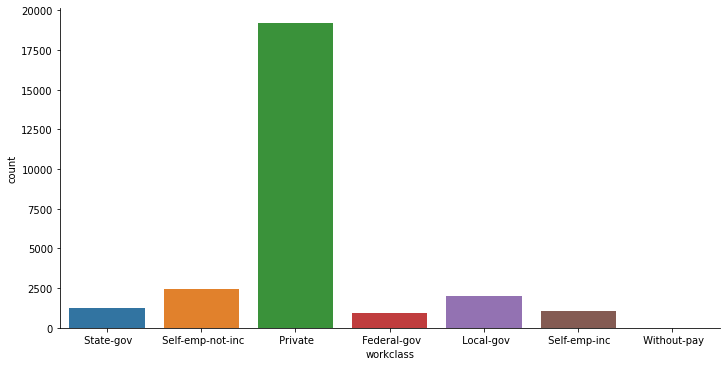

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
sns.factorplot('workclass', data=salary_train, kind="count",size = 5,aspect = 2)

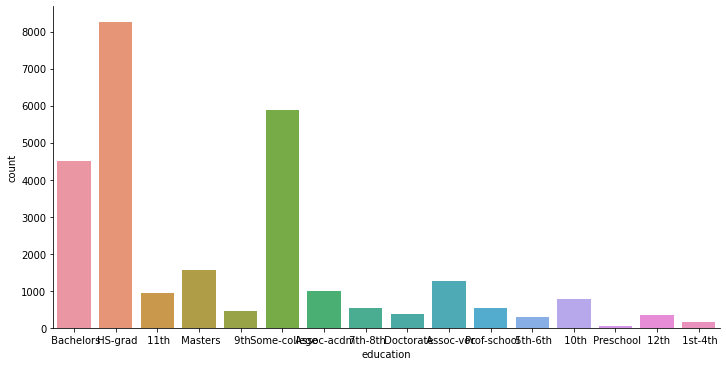

In [14]:
sns.factorplot('education', data=salary_train, kind="count",size = 5,aspect = 2)


In [16]:
salary_train.Salary.unique()


array([' <=50K', ' >50K'], dtype=object)

In [17]:
##As, the model cannot be applied directly on object data we need to encode this object variables
def encode_labels(dataset):
    from sklearn import preprocessing 
    le = preprocessing.LabelEncoder()
    for column_name in dataset.columns:
        if dataset[column_name].dtype == object:
            dataset[column_name] = le.fit_transform(dataset[column_name])
        else:
            pass

In [18]:
encode_labels(salary_train)


In [21]:
encode_labels(salary_test)


In [19]:
salary_train.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [20]:
### drop educationno variable as education is already existing
salary_train.drop(["educationno"],axis=1,inplace =True)

In [22]:
### drop educationno variable as education is already existing
salary_test.drop(["educationno"],axis=1,inplace =True)

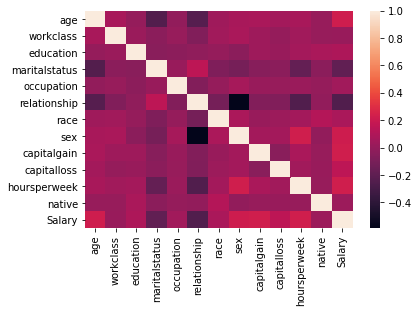

In [23]:
cor = salary_train.corr()
sns.heatmap(cor)

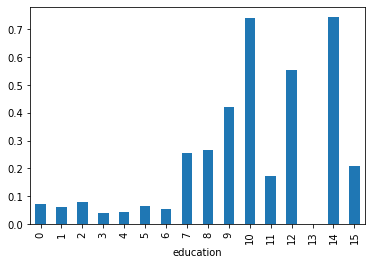

In [24]:
salary_train.groupby('education').Salary.mean().plot(kind='bar')


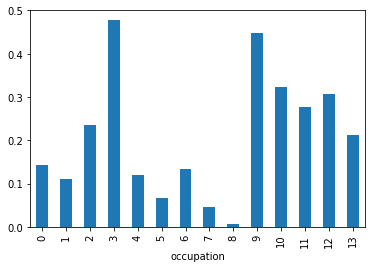

In [25]:
salary_train.groupby('occupation').Salary.mean().plot(kind='bar')


From the visualizations we can conclude that higher the education and the higher the job title, the higher is the income

#Feature Scaling¶


#### Normalising the data as there is scale difference¶


In [38]:
predictors_train = salary_train.iloc[:,0:12]
target_train = salary_train.iloc[:,12]
predictors_test = salary_test.iloc[:,0:12]
target_test = salary_test.iloc[:,12]


In [39]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [42]:
### We should normalize Input variables 
salary_train=norm_func(predictors_train)
salary_test=norm_func(predictors_test)


In [27]:
col_names=list(salary_train.columns)
col_names

['age',
 'workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native',
 'Salary']

In [44]:
train_X=salary_train
train_Y=target_train
test_x=salary_test
test_y=target_test

### Naive Bayes 


#Gaussian Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
Gmodel=GaussianNB()
train_pred_gau=Gmodel.fit(train_X,train_Y).predict(train_X)
test_pred_gau=Gmodel.fit(train_X,train_Y).predict(test_x)
train_acc_gau=np.mean(train_pred_gau==train_Y)
test_acc_gau=np.mean(test_pred_gau==test_y)

In [46]:
train_acc_gau

0.7901349291900531

In [47]:
test_acc_gau

0.7918326693227091

#Multinomial Naive Bayes


In [48]:
from sklearn.naive_bayes import MultinomialNB
Mmodel=MultinomialNB()
train_pred_multi=Mmodel.fit(train_X,train_Y).predict(train_X)
test_pred_multi=Mmodel.fit(train_X,train_Y).predict(test_x)

train_acc_multi=np.mean(train_pred_multi==train_Y)
test_acc_multi=np.mean(test_pred_multi==test_y)

In [49]:
train_acc_multi

0.7498048544771958

In [50]:
test_acc_multi

0.7596281540504648

##### for the given dataset gaussion normal distribution is performing well compared to multinomial gaussion distribution